# Unit 5 - Financial Planning


In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import sys
sys.path.append("z Class assignments/12.17.2020/MCsimulation.py")
from MCsimulation import MCSimulation
import json

%matplotlib inline

In [14]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
my_btc= 1.2
my_eth= 5.3


In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [29]:
# Fetch current BTC price
btc_response= requests.get(btc_url)
btc_data= btc_response.json()
# print(btc_data) to find price
btc_price= btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

# Fetch current ETH price
eth_response=requests.get(eth_url)
eth_data=eth_response.json()
# print(eth_data) to find price
eth_price= eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)

# Compute current value of my crpto
my_btc_value= my_btc*btc_price
my_eth_value= my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


35121.0
1119.89
The current value of your 1.2 BTC is $42145.20
The current value of your 5.3 ETH is $5935.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [30]:
# Current amount of shares
my_agg=200
my_spy=50

In [32]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [36]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investments_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
investments_df.index = investments_df.index.date
# Preview DataFrame
print(investments_df)

               AGG                                      SPY                 \
              open    high     low    close   volume   open   high     low   
2021-01-05  118.06  118.06  117.75  117.915  5915389  368.1  372.5  368.05   

                              
             close    volume  
2021-01-05  371.32  53668865  


In [38]:
# Pick AGG and SPY close prices
agg_closing_price = float(investments_df["AGG"]["close"])
spy_closing_price = float(investments_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $117.915
Current SPY closing price: $371.32


In [63]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_closing_price
my_spy_value = my_spy*spy_closing_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18566.00
The current value of your 200 AGG shares is $23583.00


### Savings Health Analysis

In [68]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame
crypto_value= my_btc_value+my_eth_value
shares_value=my_agg_value+my_spy_value

data = {"crypto":crypto_value, "shares":shares_value}
df_savings=pd.DataFrame(data=data, index=["Total"])

# Display savings DataFrame
display(df_savings)

,crypto,shares
Total,48080.617,42149.0


<AxesSubplot:title={'center':'Savings Breakdown'}, ylabel='Total'>

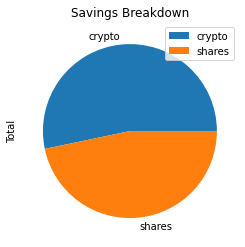

In [73]:
# Plot savings pie chart
df_savings = df_savings.T

df_savings.plot.pie(y= "Total", title="Savings Breakdown")


In [76]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_of_savings= crypto_value+shares_value
print(total_amount_of_savings)

# Validate saving health
required_amount = emergency_fund-total_amount_of_savings
if total_amount_of_savings > emergency_fund:
    print("Coungratulations you have more than enough money in your savings of an additional emergency fund!")
elif total_amount_of_savings == emergency_fund:
    print("You have the exact amount need for the emergency fund!")
elif total_amount_of_savings < emergency_fund:
    print(f"You need {required_amount} to reach the ideal emergency fund amount!")

90229.617
Coungratulations you have more than enough money in your savings of an additional emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [78]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-05', tz='America/New_York').isoformat()

In [79]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2016-01-04 00:00:00-05:00  108.09  108.29  107.93  107.99  3427605.0  200.50   
2016-01-05 00:00:00-05:00  107.87  108.12  107.87  108.02  2564401.0  201.40   
2016-01-06 00:00:00-05:00  108.34  108.46  108.22  108.43  2674241.0  198.34   
2016-01-07 00:00:00-05:00  108.40  108.47  108.21  108.43  2267940.0  195.33   
2016-01-08 00:00:00-05:00  108.57  108.71  108.35  108.67  3775874.0  195.19   

                                                              
                             high     low   close     volume  
time                                                          
2016-01-04 00:00:00-05:00  201.03  198.59  200.99  151908002  
2016-01-05 00:00:00-05:00  201.90  200.05  201.43   90242524  
2016-01-06 00:00:00-05:00  200.06  197.60  198.79  118917648  
2016-01-07 00:00:00-05:00  198.82  193.59  194.01  174230042  
2016-01-08 00:00:00-05:00  195.85  191.58  191.89  157703921

In [81]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_sim = MCSimulation(
    portfolio_data = df_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 7560
)

In [83]:
# Printing the simulation input data
thirty_year_sim.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2016-01-04 00:00:00-05:00  108.09  108.29  107.93  107.99  3427605.0   
2016-01-05 00:00:00-05:00  107.87  108.12  107.87  108.02  2564401.0   
2016-01-06 00:00:00-05:00  108.34  108.46  108.22  108.43  2674241.0   
2016-01-07 00:00:00-05:00  108.40  108.47  108.21  108.43  2267940.0   
2016-01-08 00:00:00-05:00  108.57  108.71  108.35  108.67  3775874.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-04 00:00:00-05:00          NaN  200.50  201.03  198.59  200.99   
2016-01-05 00:00:00-05:00     0.000278  201.40  201.90  200.05  201.43   
2016-01-06 00:00:00-05:00     0.003796  198.34  200.06  197.60  198.79   
2016-01-07 00:00:00-05:00     0.000000  195.33  198.82  193.59  194.01   
2016-01-08 00:00:00-05:00     0.002213  195.19  195.85  191.58  191.89   

                                                   
                              volume daily_return  
time                                               
2016-01-04 00:00:00-05:00  151908002          NaN  
2016-01-05 00:00:00-05:00   90242524     0.002189  
2016-01-06 00:00:00-05:00  118917648    -0.013106  
2016-01-07 00:00:00-05:00  174230042    -0.024045  
2016-01-08 00:00:00-05:00  157703921    -0.010927

In [84]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011516,0.999847,0.996300,1.005176,1.012363,1.005725,1.010366,0.997733,0.999329,1.002235,...,1.009992,1.003269,1.006200,1.007721,0.994925,0.989992,1.005683,1.015581,0.993962,0.996322
2,1.024210,0.999634,1.000883,0.999261,1.007216,1.004473,1.005769,0.992978,1.003779,0.997567,...,1.019507,1.010251,1.014465,1.012072,0.991427,0.986823,1.005762,1.016649,0.999565,1.008432
3,1.023823,1.005891,1.005745,1.009818,0.998944,1.009842,1.000793,1.004940,0.997111,1.000587,...,1.023621,1.009056,1.021385,0.998075,0.992969,0.983141,1.008883,1.001999,1.001847,1.012697
4,1.024092,1.007205,1.001423,1.015122,1.004796,0.996071,0.993415,1.006347,0.984937,1.004839,...,1.024419,0.995454,1.023959,1.013767,0.982730,0.975087,1.010217,0.995652,0.996804,1.016490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.791843,5.482285,35.216901,30.380245,7.349072,43.995593,6.335106,25.424909,12.501257,16.090337,...,35.291391,3.882725,11.583904,7.308897,8.890863,6.760225,20.983458,5.107533,18.530967,20.516252
7557,6.733959,5.550371,35.458611,30.130673,7.271357,44.142720,6.312261,25.232117,12.624055,15.947363,...,35.952595,3.899674,11.518990,7.324064,8.884069,6.743148,21.286611,5.151456,18.771191,20.450677
7558,6.760568,5.506003,35.599884,30.417484,7.224643,44.230261,6.231226,25.291975,12.679629,16.035829,...,35.700676,3.862562,11.739893,7.364744,8.846395,6.790183,21.117003,5.150861,18.616625,20.654886
7559,6.808595,5.478281,35.203128,30.379152,7.209214,44.070142,6.302839,25.534315,12.773983,16.236582,...,35.726793,3.905381,11.754785,7.328361,8.917357,6.741805,21.102990,5.155254,18.610490,20.776747


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

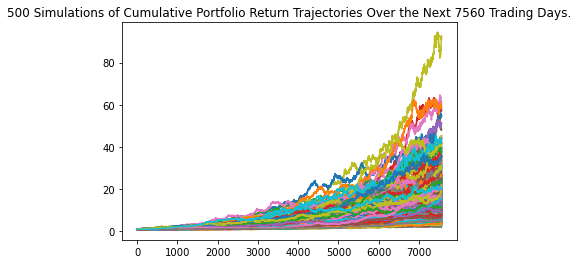

In [89]:
# Plot simulation outcomes
plot = thirty_year_sim.plot_simulation()
plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

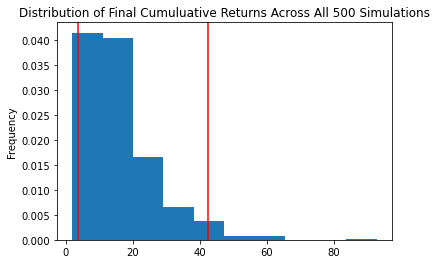

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = thirty_year_sim.plot_distribution()
dist_plot

### Retirement Analysis

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = thirty_year_sim.summarize_cumulative_return()
# Print summary statistics
summary_stats


count           500.000000
mean             16.004527
std              10.691349
min               1.941540
25%               8.500176
50%              13.181005
75%              20.541901
max              92.697732
95% CI Lower      3.789034
95% CI Upper     42.416011
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [94]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_stats[8]*initial_investment
ci_upper = summary_stats[9]*initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75780.67428545763 and $848320.2201414668


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [95]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_stats[8]*initial_investment
ci_upper = summary_stats[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113671.01142818644 and $1272480.3302122003
